In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path = "/content/drive/MyDrive/data/StressLevelDataset.csv"
df = pd.read_csv(path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [11]:
df['stress_level'].unique()

array([1, 2, 0])

In [12]:
df['stress_level'].value_counts()

,count
stress_level,
0,373
2,369
1,358


In [34]:
X = df.drop(columns=['stress_level']).copy()
y = df['stress_level'].copy()

In [9]:
print(X.head())  # Признаки

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  safety  basic_needs  academic_performance  study_load  \
0                  3       3            2  

In [10]:
print(y.head())  # Целевая переменная

0    1
1    2
2    1
3    2
4    1
Name: stress_level, dtype: int64


In [56]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# KMeans

In [37]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

In [38]:
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

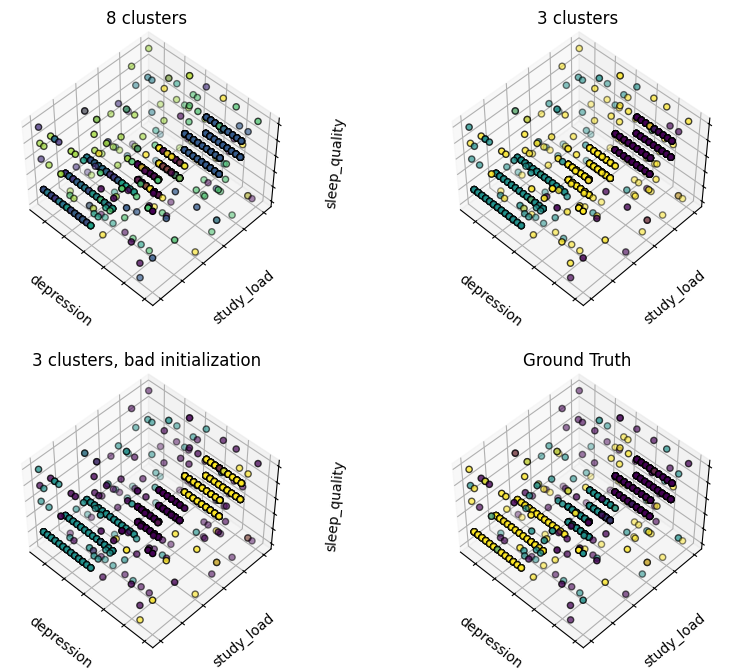

In [70]:
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["depression"], X["study_load"], X["sleep_quality"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("depression")
    ax.set_ylabel("study_load")
    ax.set_zlabel("sleep_quality")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)
ax.scatter(X["depression"], X["study_load"], X["sleep_quality"], c=y, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("depression")
ax.set_ylabel("study_load")
ax.set_zlabel("sleep_quality")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [19]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

In [43]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [44]:
best_metric

[3,
 0.4495836377583941,
 0.6540655580838013,
 array([[1.70989011e+01, 7.63736264e+00, 9.12087912e-01, 2.09725275e+01,
         3.72252747e+00, 3.00000000e+00, 1.25549451e+00, 3.71978022e+00,
         3.74725275e+00, 1.70329670e+00, 1.68131868e+00, 1.68681319e+00,
         1.68131868e+00, 3.76373626e+00, 1.55494505e+00, 4.21428571e+00,
         9.17582418e-01, 4.13186813e+00, 4.14285714e+00, 4.04395604e+00],
        [1.09571429e+01, 1.93690476e+01, 4.88095238e-01, 1.16523810e+01,
         2.54047619e+00, 1.57142857e+00, 2.57619048e+00, 2.79761905e+00,
         2.52142857e+00, 2.49523810e+00, 2.40952381e+00, 2.50238095e+00,
         2.50476190e+00, 2.43095238e+00, 2.31190476e+00, 2.48333333e+00,
         1.96904762e+00, 2.38571429e+00, 2.48095238e+00, 2.52619048e+00],
        [4.25316456e+00, 2.73417722e+01, 1.58227848e-02, 4.06012658e+00,
         1.06645570e+00, 2.05063291e+00, 4.38924051e+00, 1.58227848e+00,
         1.55379747e+00, 3.48734177e+00, 4.38924051e+00, 4.38291139e+00,
   

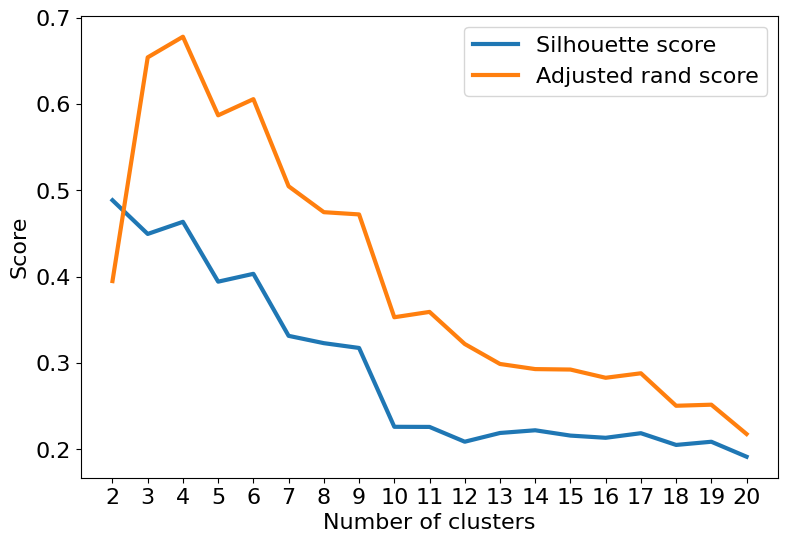

In [45]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

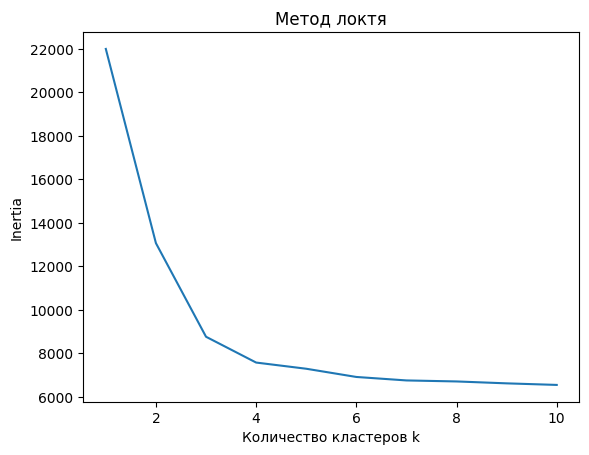

In [47]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

print("Оценка силуэта:", silhouette_score(X_scaled, labels_kmeans))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_kmeans))

Оценка силуэта: 0.41700527843553103
Скорректированный индекс Рэнда: 0.6324706094304563


# Иерархическая

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram

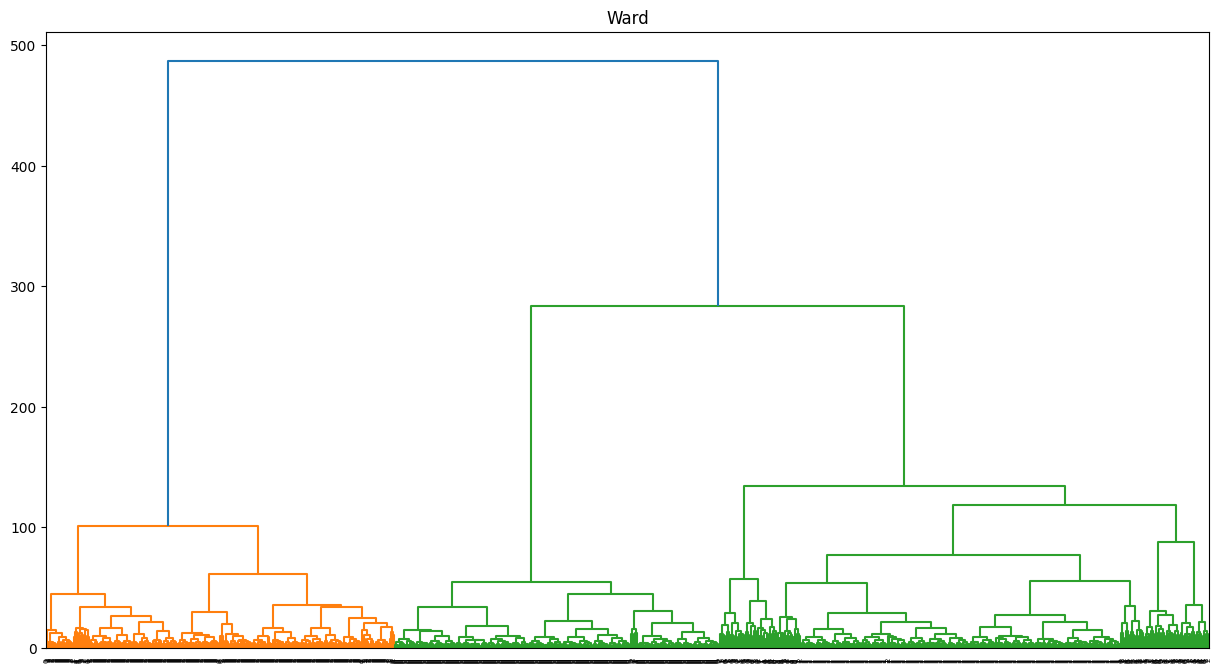

In [52]:
samples = X.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Ward')
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

In [25]:
X_ = df.copy()

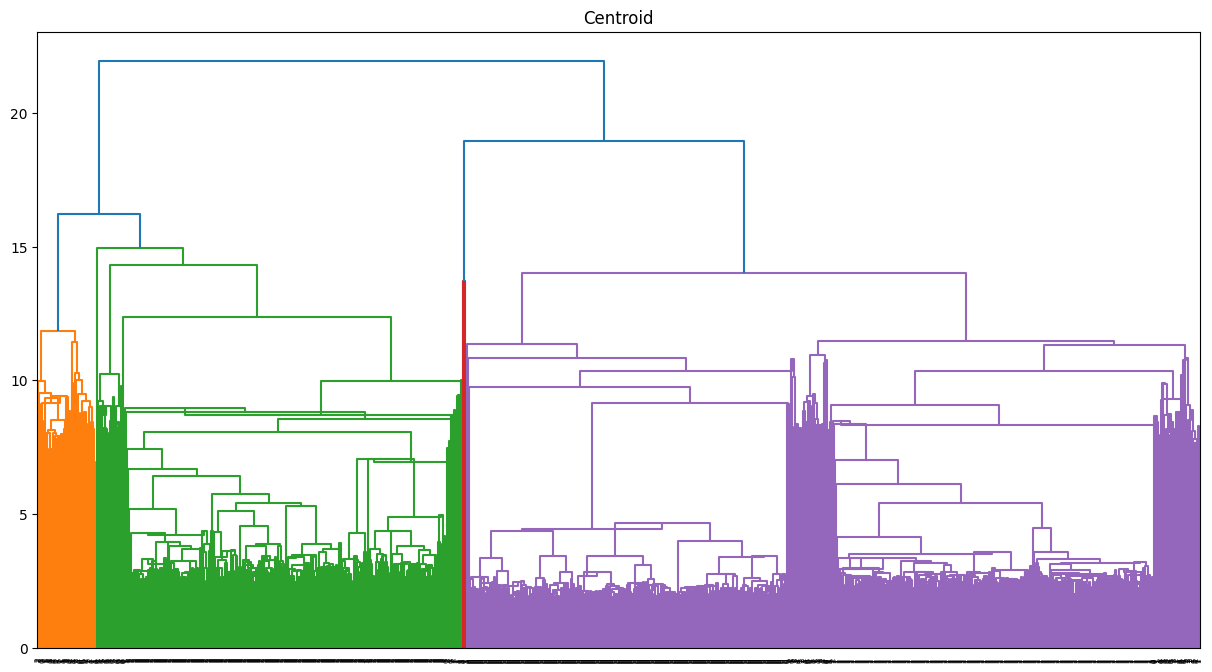

In [27]:
samples = X.values

mergings = linkage(samples, method='centroid')

plt.figure(figsize=(15, 8))
plt.title('Centroid')

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

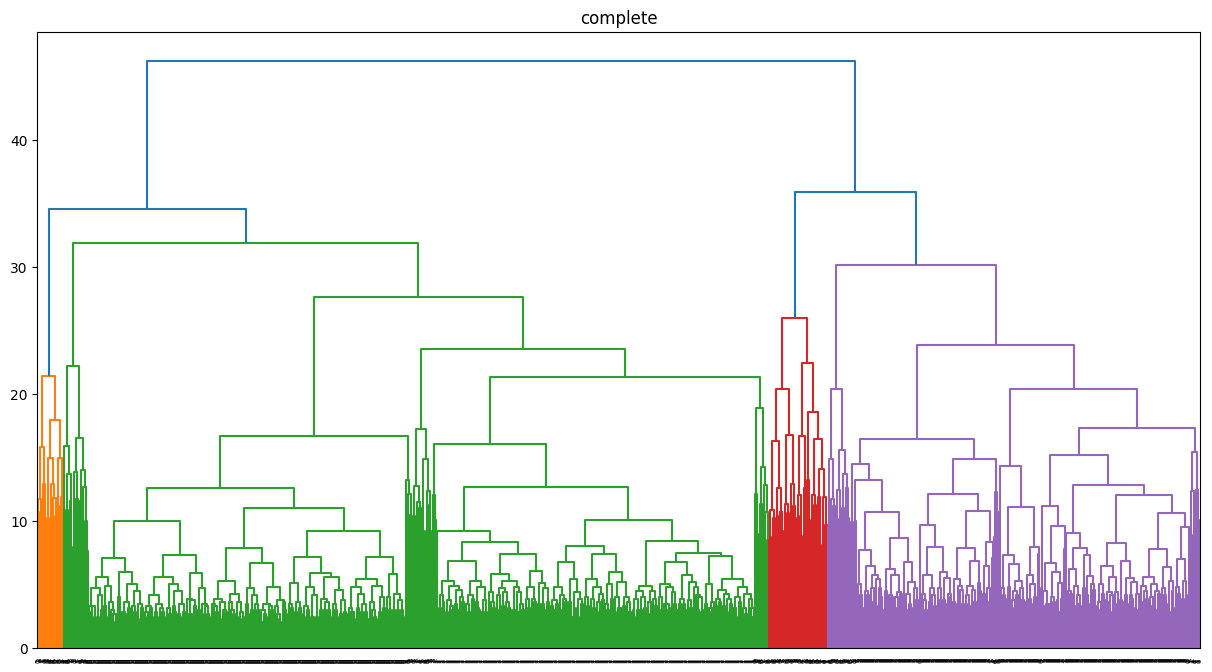

In [53]:
mergings = linkage(samples, method='complete')

plt.figure(figsize=(15, 8))
plt.title('complete')

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

# DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets

In [57]:
mins = X_.shape[1]

In [61]:
db = DBSCAN(eps=2.1, min_samples=10).fit(X_scaled)

labels = db.labels_
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [62]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

['r', 'b', 'c']


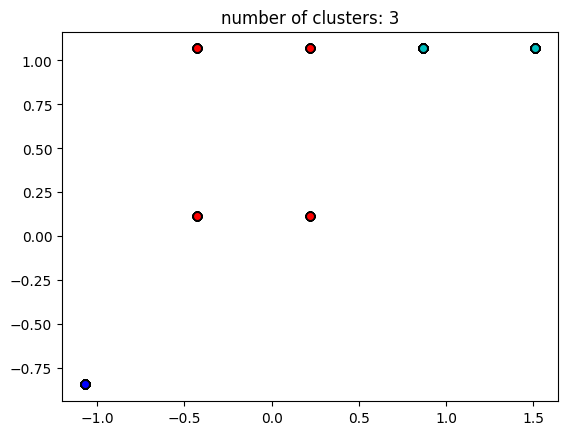

In [65]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

colors = ['r', 'b', 'c']
print(colors)
for k, col in zip(unique_labels, colors):
  if k == -1:
    col = 'k'
  class_member_mask = (labels == k)

  xy = X_scaled[class_member_mask & core_samples_mask]
  plt.plot(xy["sleep_quality"], xy["social_support"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

  xy = X_scaled[class_member_mask & ~core_samples_mask]
  plt.plot(xy["sleep_quality"], xy["social_support"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

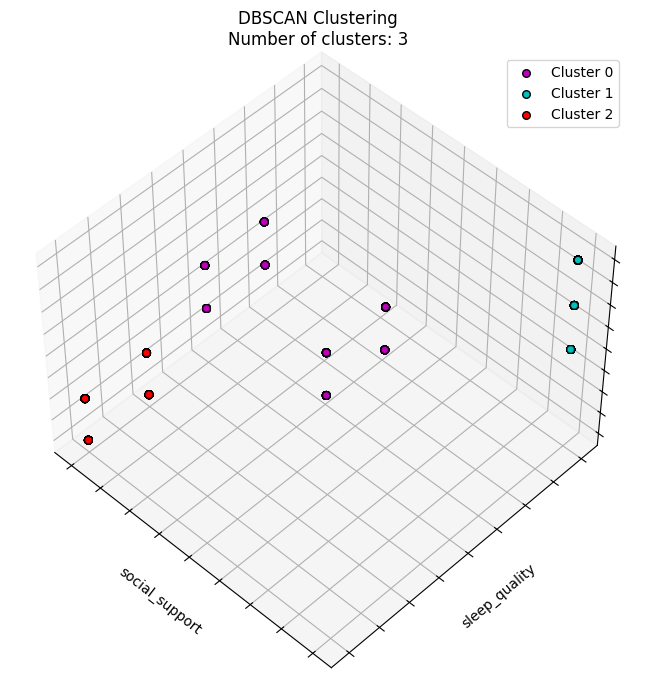

In [67]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

unique_labels = set(labels)
colors = ['m', 'c', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'w'

    class_member_mask = (labels == k)

    xy_core = X[class_member_mask & core_samples_mask]
    ax.scatter(xy_core["social_support"], xy_core["sleep_quality"], xy_core["study_load"], c=col, edgecolor="k", s=30, label=f"Cluster {k}" if k != -1 else "Noise")

    xy_noncore = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy_noncore["social_support"], xy_noncore["sleep_quality"], xy_noncore["study_load"], c=col, edgecolor="k", s=30)

ax.set_xlabel("social_support")
ax.set_ylabel("sleep_quality")
ax.set_zlabel("study_load")
ax.set_title(f"DBSCAN Clustering\nNumber of clusters: {n_clusters_}")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.legend()
plt.show()

In [68]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

labels_filtered = labels[labels != -1]  # Исключаем шум
X_filtered = X[labels != -1]  # Исключаем шум из данных

sc = metrics.silhouette_score(X_filtered, labels_filtered)
print("Silhouette Coefficient: %0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient: 0.57
Adjusted Rand Index: 0.71
